#                                         Heart Disease Prediction

In this project , I have collected a data from github and here is the link https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv with this data set I will be using machine learning to predict whether a person is suffering from heart disease or not.


In [419]:
# These are standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Getting my data ready and Data cleaning



1.Split the data into features and labels(X and Y)
2.Checking and Filling the missing values if there is any.
3.Converting non numerical values to numerical values

In [420]:
#Getting a data ready
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

In [421]:
heart_disease.head() # gives the first five values.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [422]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding any missing values 

In [404]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


checking if there was any null values or not, If there was a null value then we have to fill the missing values, I have also checked whether all the number are numeric or not, here all the numbers are numeric.

In [140]:
heart_disease.shape

(303, 14)

shape tells the number of rows and columns, here in our dataset there are 303 rows and 14 coulmns

# Data Visualisation

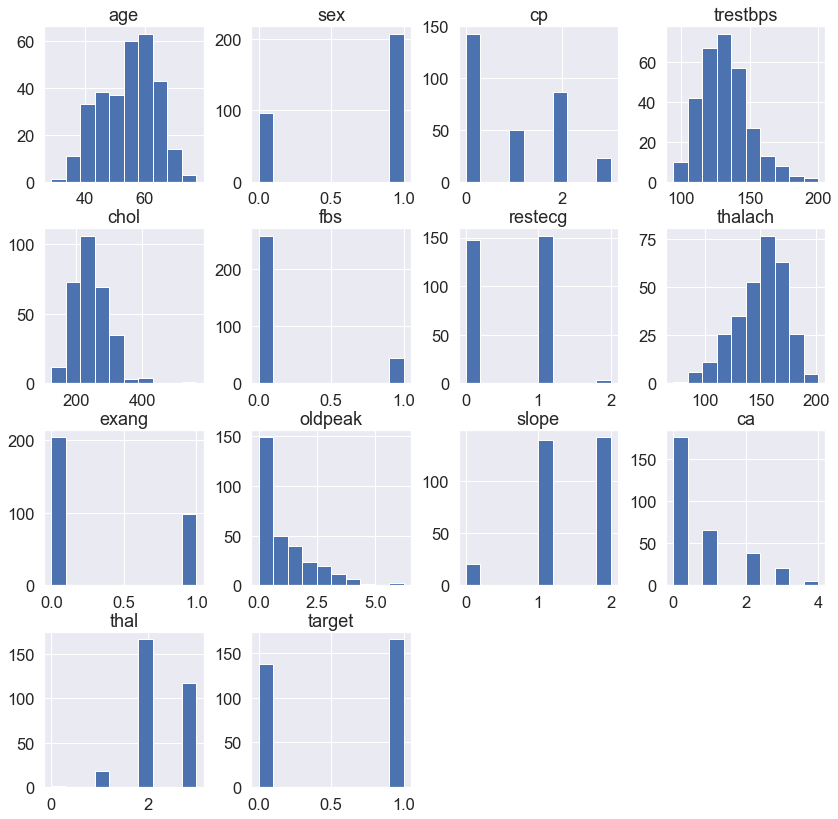

In [405]:
heart_disease.hist(figsize=(14,14))
plt.show()

Graph is telling there are more heart disease patients from age 50 to 60 and also telling there are 99 female and 207 male.Likwise it is also telling that how many have heart disease or not.

/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

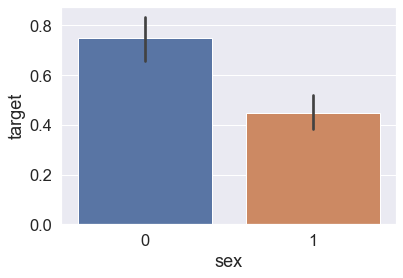

In [406]:
sns.barplot(heart_disease["sex"],heart_disease["target"])

The above graph tells that there are more female heart_disease patients as conmpared to male

1    165
0    138
Name: target, dtype: int64


/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


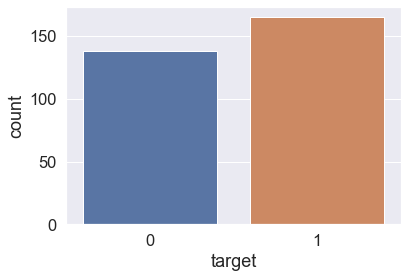

In [407]:
z = heart_disease['target']

sns.countplot(z)
target_temp = heart_disease.target.value_counts()

print(target_temp)



Above graph tells that there are 165 heart disease pateints and 138 non heart disease patients

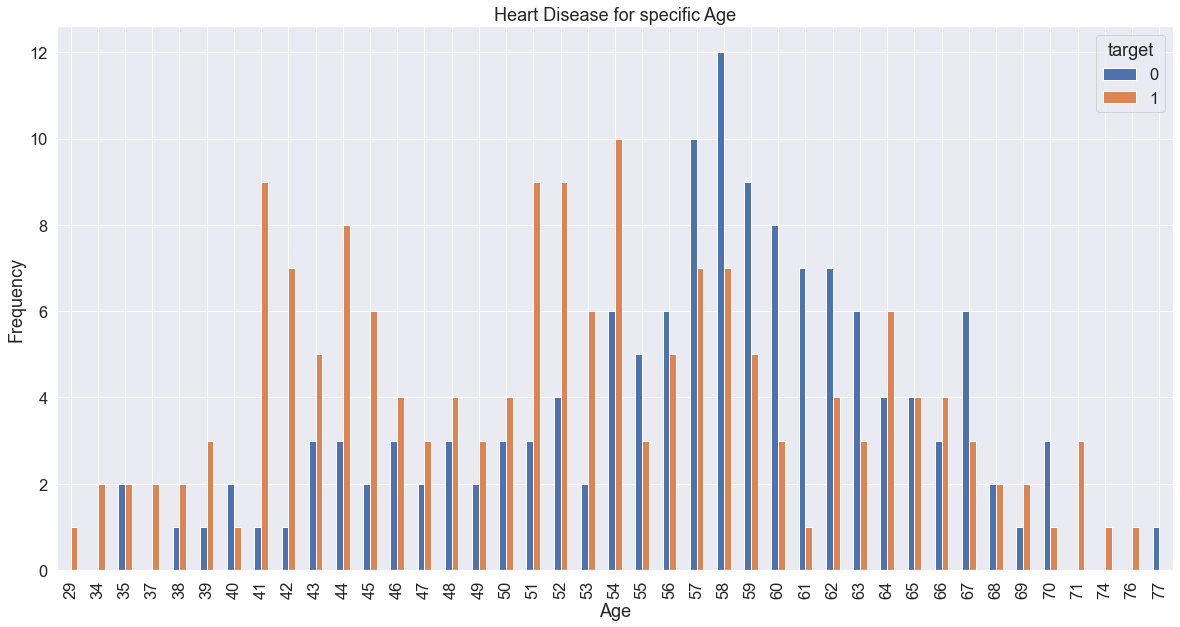

In [408]:
pd.crosstab(heart_disease.age,heart_disease.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease for specific Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

**by the graph we can know that heart disease likely to occur at the age of 58**


/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

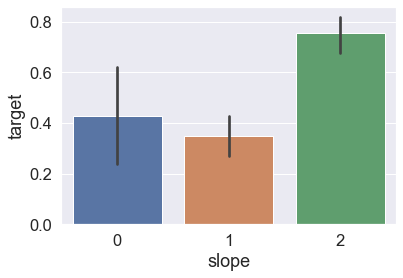

In [411]:
sns.barplot(heart_disease["slope"],y)

I observe that the Slope 2 causes heart pain much more than Slope 0 and 1.


/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

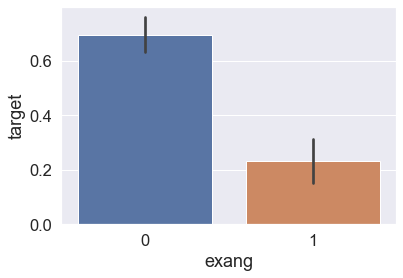

In [413]:
sns.barplot(heart_disease["exang"],y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

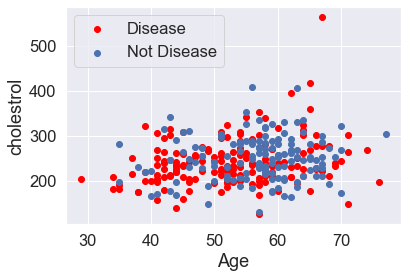

In [417]:
plt.scatter(x=heart_disease.age[heart_disease.target==1], y=heart_disease.chol[(heart_disease.target==1)], c="red")
plt.scatter(x=heart_disease.age[heart_disease.target==0], y=heart_disease.chol[(heart_disease.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("cholestrol")
plt.show()

In [149]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

# Splitiing the data into training and testing set

In [423]:
X = heart_disease.drop("target", axis = 1 ) # X contains all the columns except target column which is to be predicted.
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


**In X there are every single column except target coulmn which is to be predicted. We are using the coulmns present in X to predict the target column**

In [424]:
Y = heart_disease['target']
Y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In Y  there is only target column

**In machine learning fundamental principle is to never evaluate or test your models on the data that it is learnt from which is why we split in training and test set**

In [425]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)

In [426]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((242, 13), (61, 13), (242,), (61,))

**Shape is showing that there are 242 columns instead of 303 thats because we have decided that our test dataset will be 20 percent of the overall data by giving the parameter of test_size to 0.2**

# Feature Selection

This is done in order to find out that all the features are positively correlated or negatively correlated. I am using the corr() which will that will try to find out all the feature and how it is correlated to target variable. like we are seeing cholestrol is having a positive relation with trestbps.

In [427]:
numeric_columns=['trestbps','chol' , 'age' , 'oldpeak' , 'thalach']

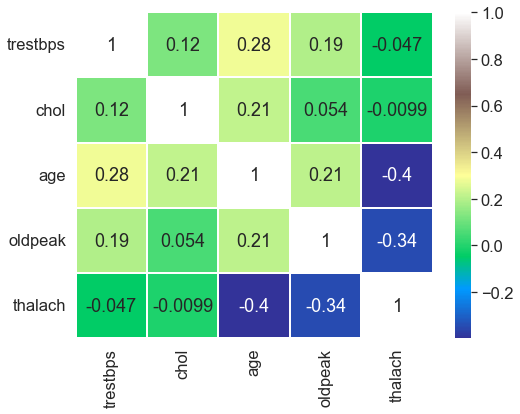

In [428]:
sns.heatmap(heart_disease[numeric_columns].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

## Data Preprocessing

In [429]:
X = heart_disease.drop("target", axis = 1 ) # X contains all the columns except target column which is to be predicted.
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [430]:
Y = heart_disease['target']
Y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [431]:
# split the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)

# Choosing an estimator for classification problem

choosing the right model depends on the factors like a sample size that if it is more than 50 and it is predicting a category and it is a labeled data with more than 100k sample we can choose  KNeighborsClassifier, decision tree classifier etc.



# Fitting the Model 

## Decision Tree

Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [432]:
#Build a machine learning model 

from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)   # setting up th random seed.


X=heart_disease.drop("target" , axis =1)     

Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


clf = DecisionTreeClassifier()    # instantiating Decision tree 
clf.fit(X_train,Y_train)     # Fitting my model to the data , training the machine learning model  
clf.score(X_test,Y_test)   # Returns the mean accuracy on the givent test data and labels

0.819672131147541

when we pass X and y to fit it will the cause the model to go through all of the example in X which is the training data in our case and see what their correspondening data Y label is and try to figure out the pattern that leads to 1 as a label or 0 as a label.

We can see that this model is giving us the accuracy of 81%

## Make prediction using our machine learning model.

## 1. Predict()
## 2. Predict_proba()

In [433]:
clf.predict(X_test) # predicted values

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [434]:
np.array(Y_test) # Actual/truth values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

**Here we have made predictions on the test data to predict someone has or not has heart disease, so now we can compare the prediction to truth**


In [435]:
# compare prediction to truth label to evaluate the model 

y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)


0.819672131147541

**Here we are calculating the accuracy and comparing how well our model did for each sample shown above.**

In [436]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , y_preds)

0.819672131147541

**returns the mean accuracy on the given test data and labels**

# Predict_Proba()

It returns the probabilites of classification labels

In [437]:
clf.predict_proba(X_test[:5])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [438]:
clf.predict(X_test[:5])

array([0, 0, 0, 0, 1])

In [439]:
# compare prediction to the truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test , y_preds)

0.18032786885245902

**on average each one of our model predictions is 0.18 different to the actual test value.**

In [440]:
clf.predict(X_test[:5])

array([0, 0, 0, 0, 1])

In [441]:
y_preds[:10]


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [442]:
np.array(Y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [443]:
# Evaluating a machine learning model .

clf.score(X_train , Y_train)

1.0

In [444]:
clf.score (X_test , Y_test)

0.819672131147541

# Evaluating a model using the score parameter


## Cross Validation Score 

cross validation does five splits by default and use the first 20 percent. Model is trained on 5 different version of training data, and evaluated on five different version of test data. It aims to provide solution to not training on all the data avoiding getting lucky scoreson just single split of data , so it will create five different splits,  so our model is trained and evaluated on all our data 

In [445]:
from sklearn.model_selection import cross_val_score

In [446]:
cross_val_score(clf,  X , Y)

array([0.7704918 , 0.86885246, 0.81967213, 0.75      , 0.71666667])

In [447]:
np.random.seed(42)

# single training and test split score 

clf_single_score = clf.score(X_test , Y_test)
clf_single_score

# Take the mean of 5 fold cross validation score

clf_cross_val_score = np.mean(cross_val_score(clf, X,Y , cv = 5))

clf_single_score , clf_cross_val_score

(0.819672131147541, 0.7521857923497268)

**when you compare the accuracy of normal score with cross_val_score then the accuracy of cross_val_score will be lower but if you are asked to report the accuracy then you will prefer cross_val_score**

In [448]:
cross_val_score(clf,  X , Y , cv =5 , scoring = None )

array([0.75409836, 0.81967213, 0.73770492, 0.7       , 0.71666667])

In [449]:
cross_val_score =cross_val_score(clf,  X , Y)

In [450]:
np.mean(cross_val_score)

0.7521857923497268

# Classification model evaluation metrics 


## ROC Curve 

**A Roc Curve is comparision of a model's true positive rate versus model's false positive rate.**


**True positive = model predicts 1 when truth is 1,
False positive = model predicts 1 when truth is 0,
True Negative = model predicts 0 when truth is 0,
False negative = model predicts 0 when truth is 1**

In [451]:
from sklearn.metrics import roc_curve

clf.fit(X_train,Y_train)

# Make prediction with probabilites

Y_probs = clf.predict_proba(X_test)
Y_probs[:10]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [452]:
Y_probs_positive = Y_probs[: , 1]
Y_probs_positive[:10]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

In [453]:
fpr , tpr , thresholds = roc_curve(Y_test , Y_probs_positive)

fpr

array([0.        , 0.10344828, 1.        ])

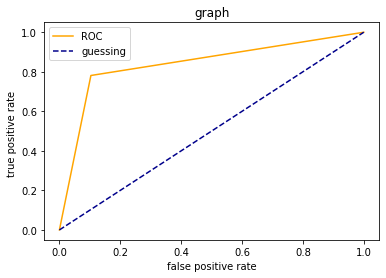

In [44]:
# create a function for roc curve 

import matplotlib.pyplot as plt 

def plot_roc_curve(fpr ,tpr):
    
    """
    plot a roc curve given the false positive rate and true positive rate model
    """
    
    plt.plot(fpr ,tpr , color='orange' , label = 'ROC')
    
    # plot line with no predictive power
    
    plt.plot([0,1] ,[0,1] , color='darkblue' , linestyle='--' , label = 'guessing')
    
    # customize the plot 
    
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate ')
    plt.title('graph')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

It is comparing true positive rate versus false positive rate 

In [454]:
from sklearn.metrics import roc_auc_score

In [455]:
roc_auc_score(Y_test , Y_probs_positive)

0.8389008620689655

# Confusion Matrix


 Confusion matrix is a way to compare the labels a model predicts and actual labels it was supposed to predict.

In [456]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)

array([[26,  3],
       [ 7, 25]])

**Visualizing the confusion matrix** 

In [457]:
pd.crosstab(Y_test , Y_preds,rownames=['Actual labels'] , colnames = ['predicted labels'])

predicted labels,0,1
Actual labels,,
0,26,3
1,7,25


**Above matrix is trying to say that model that predicted 1 but the actual label is 0 are 3, these are false positives, similarly predicted label 0 but the actual label is 1 are 7 these are false negative, Here our model is getting confused**

In [458]:
import seaborn as sns 

<AxesSubplot:>

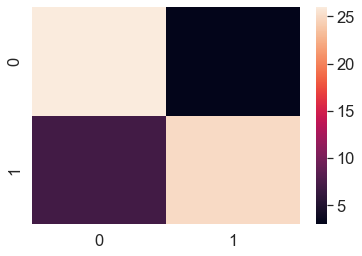

In [459]:
sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(Y_test , Y_preds)

sns.heatmap(conf_mat)

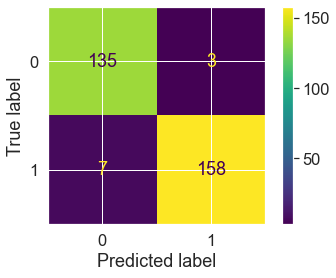

In [460]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)

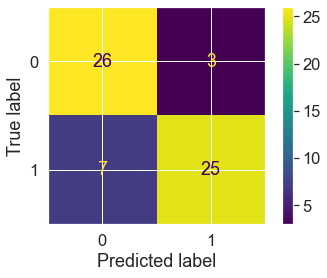

In [461]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                       y_pred = Y_preds)

# Classification Report

In [462]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test , Y_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



**Precision** - Indicates the proportion of positive identification (model predicted class 1) which were actually correct. A model which produces no false positive has precision of 1

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1

**F1 score** -  A combination of precision and recall. A perfect model achieves an F1 score of 1.

**support** - The number of samples each metric was calculated on.

**Accuracy** - Accuracy of a model in decimal form. Perfect accuracy is equal to 1.0



In [463]:
#where precision and recall become valuable 

disease_true = np.zeros(1000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(1000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


so this is kind of use case scenerio of where you want to make sure that you are using a wide spectrum of evalution metrics for your classification model and not just the accuracy.

By the classification metrics we understood that:

if classes are not balanced **Accuracy** is a good measure. **precision and recall** also become more important in this case. Aim for the higher precision if false positive precision are worse than false negative.




# Regression model evaluation regression 

### R^2 or coefficient of determination 






It compares your model prediction to mean of the targets. Value can range from negative infinity to 1

In [464]:
from sklearn.metrics import r2_score

# fill an array with y_test mean 

y_test_mean = np.full(len(Y_test) , Y_test.mean())

y_test_mean[:10]

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016])

In [465]:
r2_score(y_true = Y_test,
        y_pred = y_test_mean)

0.0

In [466]:
r2_score(y_true = Y_test,
        y_pred = Y_test)

1.0

# **Mean Absolute Error**


It is the average of absolute differences between prediction and actual values. It gives you and idea of how wrong your model predictions are.

In [467]:
from sklearn.metrics import mean_absolute_error

y_preds = clf.predict(X_test)
mae = mean_absolute_error(Y_test , y_preds)
mae

0.16393442622950818

In [468]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [469]:
df = pd.DataFrame(data = {"actual values" : Y_test,
                         "predicted values" : y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
179,0,0,0
228,0,0,0
111,1,0,-1
246,0,0,0
60,1,1,0
9,1,0,-1
119,1,1,0
223,0,0,0
268,0,0,0
33,1,1,0


In [470]:
np.abs(df["differences"]).mean()

0.16393442622950818

# Mean squared error

MSE is mean of square of errors between actual and predicted value.


In [471]:
from sklearn.metrics import mean_squared_error

y_preds = clf.predict(X_test)
mse = mean_squared_error(Y_test , y_preds)
mse

0.16393442622950818

In [472]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
179,0,0,0,0
228,0,0,0,0
111,1,0,-1,1
246,0,0,0,0
60,1,1,0,0


In [473]:
# calculate MSE by hand 

squared =np.square(df["differences"])
squared.mean()

0.16393442622950818

In [474]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [475]:
df_large_error.head()


,actual values,predicted values,differences,squared_differences
179,0,0,0,16
228,0,0,0,0
111,1,0,-1,1
246,0,0,0,0
60,1,1,0,0


In [476]:
df_large_error["squared_differences"].mean()

0.4262295081967213

In [477]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
179,0,0,0,16
228,20,20,20,20
111,20,20,20,20
246,20,20,20,20
60,20,20,20,20
...,...,...,...,...
249,20,20,20,20
104,20,20,20,20
300,20,20,20,20
193,20,20,20,20


In [478]:
# calculate mse with large error 

df_large_error["squared_differences"].mean()

19.934426229508198

#   Using scoring parameter

In [479]:
from sklearn.model_selection import cross_val_score

# cross validation accuracy

cv_acc = cross_val_score(clf , X , Y , cv=5 , scoring =  "accuracy")
cv_acc

array([0.73770492, 0.83606557, 0.72131148, 0.68333333, 0.7       ])

In [480]:
np.mean(cv_acc)

0.7356830601092896

In [481]:
# precision 

np.random.seed(42)

cv_precision = cross_val_score(clf , X , Y , cv=5 , scoring = "precision")
cv_precision

array([0.84615385, 0.87096774, 0.78125   , 0.71875   , 0.69767442])

In [482]:
#recall 

np.random.seed(42)

cv_recall = cross_val_score(clf , X , Y , cv=5 , scoring = "recall")
cv_recall


array([0.66666667, 0.81818182, 0.75757576, 0.6969697 , 0.90909091])

In [483]:
np.mean(cv_recall)

0.7696969696969698

In [484]:
cv_r2 = cross_val_score(clf , X , Y , cv=5 , scoring = None)
np.mean(cv_r2)

0.7456284153005465

In [485]:
# mean absolute error 

cv_mae = cross_val_score(clf , X , Y , cv=5 , scoring = "neg_mean_absolute_error")
np.mean(cv_mae)


-0.24781420765027323

In [486]:
# mean squared error 

cv_mse = cross_val_score(clf , X , Y , cv=5 , scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.2344808743169399

In [487]:
def evaluate_preds(y_true , y_preds):
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    metric_dict = {"accuracy" : round(accuracy , 2),
                  "precision" : round(precision , 2),
                  "recall" : round(recall, 2),
                  "f1": round(f1 , 2)}
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"precision:{precision:.2f}")
    print(f"recall:{recall:.2f}")
    print(f"f1 score:{f1:.2f}")
    
    return metric_dict
        

In [488]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

np.random.seed(42)

#shuffle the data 

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x and y

x = heart_disease_shuffled.drop("target" , axis = 1)

y = heart_disease_shuffled["target"]

# split the data into train , test and validation 

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of dataset

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

x_train , y_train = x[:train_split] , y[:train_split]
 
x_valid , y_valid = x[train_split:valid_split] , y[train_split:valid_split]

x_test , y_test = x[valid_split:] , y[valid_split:]

len(x_train) , len(x_valid) , len(x_test)

clf = DecisionTreeClassifier()

clf.fit(x_train , y_train)

# make basleine prediction 

y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics

Acc:80.00%
precision:0.79
recall:0.88
f1 score:0.83


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.88, 'f1': 0.83}

In [489]:
np.random.seed(42)

# create a second classifier with different hyperparameter

clf_2 = DecisionTreeClassifier(max_depth=3)

clf_2.fit(x_train , y_train)

y_preds_2 = clf_2.predict(x_valid)

clf_2_metrics = evaluate_preds(y_valid , y_preds_2)



Acc:82.22%
precision:0.81
recall:0.88
f1 score:0.85


In [498]:
np.random.seed(42)

# create a second classifier with different hyperparameter

clf_2 = DecisionTreeClassifier(max_depth=20 , ccp_alpha=0.015)

clf_2.fit(x_train , y_train)

y_preds_2 = clf_2.predict(x_valid)

clf_2_metrics = evaluate_preds(y_valid , y_preds_2)




Acc:80.00%
precision:0.77
recall:0.92
f1 score:0.84


In [533]:
np.random.seed(42)

# create a second classifier with different hyperparameter

clf_2 = DecisionTreeClassifier(max_depth=7 , ccp_alpha=0.015)

clf_2.fit(x_train , y_train)

y_preds_2 = clf_2.predict(x_valid)

clf_2_metrics = evaluate_preds(y_valid , y_preds_2)




Acc:80.00%
precision:0.77
recall:0.92
f1 score:0.84


**Setting the different parameters I found that best result of 82% accuracy is comming at max_dept = 3 and ccp_alpha = 0.015**

# K Nearest Neighbour

In [499]:
from sklearn.neighbors import KNeighborsClassifier

In [500]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

In [501]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [502]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

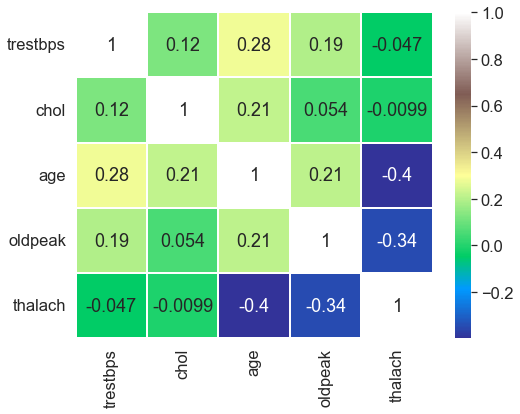

In [503]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

# Data Processing

In [504]:
dataset = pd.get_dummies(df, columns = ["sex" , "cp" , "fbs" , "restecg" , "exang" , "slope" , "ca" , "thal"])

In [505]:
from sklearn.preprocessing import StandardScaler

In [506]:
standardScaler = StandardScaler()

columns_to_scale = ['age' , 'trestbps' , 'chol' , 'thalach' , 'oldpeak']

dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [507]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [508]:
y = dataset['target']
x = dataset.drop(['target'] , axis =1)



In [509]:
knn_scores = []

for k in range(1,5):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier , x , y , cv =3)
    knn_scores.append(score.mean())

**for every iteration I am finding the mean of the score which will be the accuracy, because the cv = 3 and plotting the graph for different value of k.**

Text(0.5, 1.0, 'K Neighbors classifier scores for different K values')

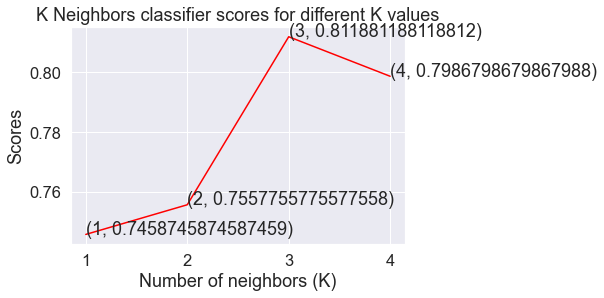

In [510]:
plt.plot([k for k in range (1,5)], knn_scores , color = 'red')

for i in range(1,5):
    plt.text(i , knn_scores[i - 1], (i , knn_scores[i-1]))
plt.xticks([i for i in range(1,5)])
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors classifier scores for different K values')

In [511]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 4)
score = cross_val_score(knn_classifier , x , y , cv =5)


In [512]:
score.mean()

0.8020218579234972

**The accuracy of the model is 80%**

In [513]:
models = {"Decision Tree Classifier" :  DecisionTreeClassifier() , 
          "KNN" : KNeighborsClassifier() }

def fit_and_score(models , X_train , X_test , Y_train , Y_test):
    
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        
        model.fit(X_train , Y_train)
        
        model_scores[name] = model.score(X_test , Y_test)
    return model_scores

In [514]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            Y_train = Y_train,
                            Y_test = Y_test)



<AxesSubplot:>

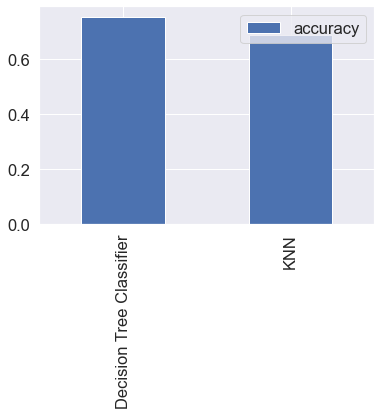

In [515]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar()

# Conclusion

The conclusion is that decision tree classifier is giving the better accuracy than KNN. initially decsion tree was giving the accuracy of 80% but after setting different parameters of max depth I got the best results at. max_depth = 3 which was 82 %. For KNN I got the best result at K = 4 which is 80%. So we can conclude that Decision tree is performing better than KNN.


# Dataset 2

In [564]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [565]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [566]:
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [567]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [569]:
df.shape

(270, 14)

# Data Processing

After see the description of dataset I felt the neeed to convert the categorical variables to dummy variables and scale all the values by using get_dummies method 

In [570]:
dummy = pd.get_dummies(df['Heart Disease'])
dummy.head()

,Absence,Presence
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [571]:
df2 = pd.concat((df, dummy), axis = 1)
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,1,0


In [572]:
df2 = df2.drop(['Heart Disease'], axis = 1)

In [573]:
df2

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,0


In [574]:
df2 = df2.drop(['Presence'], axis = 1)

In [575]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Absence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [576]:
df2 = df2.rename(columns={"Absence":"Heart Disease"})

In [577]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# Data Visualisation

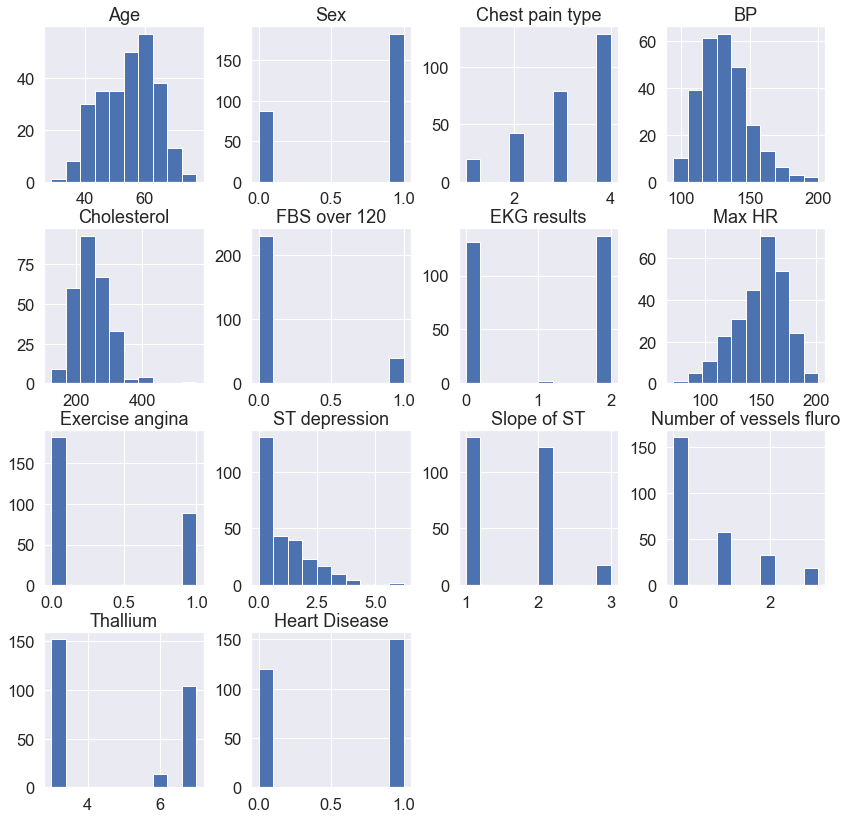

In [578]:
df2.hist(figsize=(14,14))
plt.show()

1    150
0    120
Name: Heart Disease, dtype: int64


/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


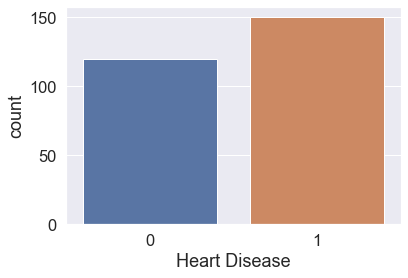

In [579]:
z = df2['Heart Disease']

sns.countplot(z)
target_temp = df2["Heart Disease"].value_counts()

print(target_temp)




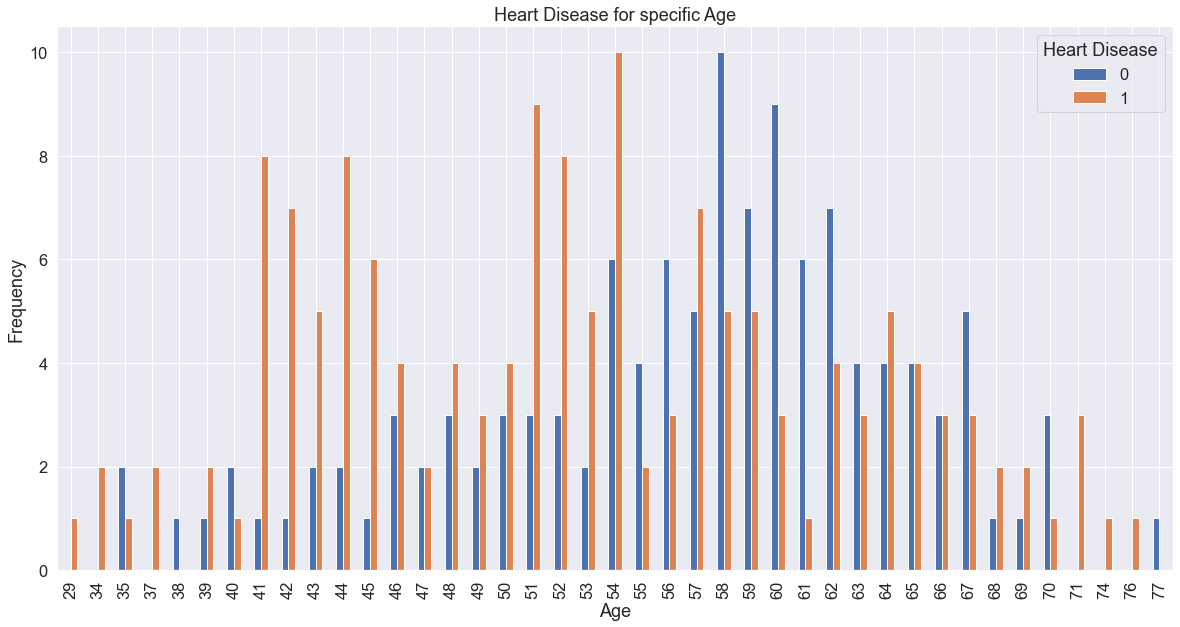

In [580]:
pd.crosstab(df2.Age,df2["Heart Disease"]).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease for specific Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAge.png')
plt.show()

In [552]:
df2.Sex.value_counts()

1    183
0     87
Name: Sex, dtype: int64

# Train, Test and Split

In [581]:
X = df2.drop("Heart Disease", axis = 1 ) # X contains all the columns except target column which is to be predicted.
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [582]:
Y = df2['Heart Disease']
Y.head

<bound method NDFrame.head of 0      0
1      1
2      0
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    0
Name: Heart Disease, Length: 270, dtype: uint8>

In [583]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)

In [584]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [585]:
numeric_columns=['BP','Cholesterol' , 'Age' , 'Max HR' , 'Thallium']

# Feature Selection

This is done in order to find out that all the features are positively correlated or negatively correlated. I am using the corr() which will that will try to find out all the feature and how it is correlated to target variable. like we are seeing cholestrol is having a positive relation with BP.

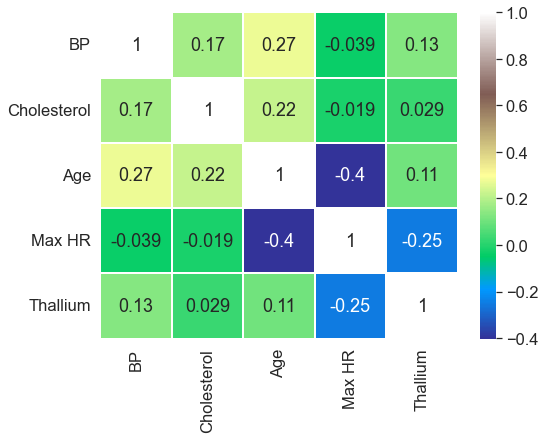

In [586]:
sns.heatmap(df2[numeric_columns].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

# Choosing a Decision Tree Model

In [587]:
#Build a machine learning model 

from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)   # setting up th random seed.


X=df2.drop("Heart Disease" , axis =1)     

Y = df2["Heart Disease"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


clf = DecisionTreeClassifier()    # instantiating Decision tree 
clf.fit(X_train,Y_train)     # Fitting my model to the data , training the machine learning model  
clf.score(X_test,Y_test)   # Returns the mean accuracy on the givent test data and labels

0.6851851851851852

The accuracy of the model is 68%

In [588]:
clf.predict(X_test) # predicted values

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [589]:
np.array(Y_test) # Actual/truth values

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [590]:
# compare prediction to truth label to evaluate the model 

y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)



0.6851851851851852

In [591]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , y_preds)


0.6851851851851852

In [592]:
clf.predict_proba(X_test[:5])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [593]:
clf.predict(X_test[:5])

array([0, 0, 1, 1, 0], dtype=uint8)

In [ ]:
# compare prediction to the truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test , y_preds)

In [594]:
clf.predict(X_test[:5])

array([0, 0, 1, 1, 0], dtype=uint8)

In [595]:
y_preds[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=uint8)

In [596]:
np.array(Y_test[:10])

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [597]:

clf.score(X_train , Y_train)

1.0

In [598]:
clf.score (X_test , Y_test)

0.6851851851851852

In [599]:
cross_val_score(clf,  X , Y)

array([0.68518519, 0.66666667, 0.81481481, 0.68518519, 0.81481481])

In [600]:
np.random.seed(42)

# single training and test split score 

clf_single_score = clf.score(X_test , Y_test)
clf_single_score

# Take the mean of 5 fold cross validation score

clf_cross_val_score = np.mean(cross_val_score(clf, X,Y , cv = 5))

clf_single_score , clf_cross_val_score

(0.6851851851851852, 0.7333333333333334)

In [601]:
cross_val_score(clf,  X , Y , cv =5 , scoring = None )

array([0.64814815, 0.68518519, 0.81481481, 0.72222222, 0.81481481])

In [602]:
cross_val_score =cross_val_score(clf,  X , Y)

In [603]:
np.mean(cross_val_score)

0.7555555555555555

**cross validation score is giving much better score of 75% than the normal score**

In [604]:
from sklearn.metrics import roc_curve

clf.fit(X_train,Y_train)

# Make prediction with probabilites

Y_probs = clf.predict_proba(X_test)
Y_probs[:10]



array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [605]:
Y_probs_positive = Y_probs[: , 1]
Y_probs_positive[:10]

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [606]:
fpr , tpr , thresholds = roc_curve(Y_test , Y_probs_positive)

fpr

array([0.        , 0.23809524, 1.        ])

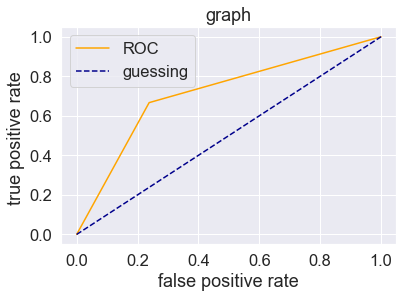

In [607]:
# create a function for roc curve 

import matplotlib.pyplot as plt 

def plot_roc_curve(fpr ,tpr):
    
    """
    plot a roc curve given the false positive rate and true positive rate model
    """
    
    plt.plot(fpr ,tpr , color='orange' , label = 'ROC')
    
    # plot line with no predictive power
    
    plt.plot([0,1] ,[0,1] , color='darkblue' , linestyle='--' , label = 'guessing')
    
    # customize the plot 
    
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate ')
    plt.title('graph')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [608]:
roc_auc_score(Y_test , Y_probs_positive)

0.7142857142857142

In [609]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)

array([[16,  5],
       [11, 22]])

In [610]:
pd.crosstab(Y_test , Y_preds,rownames=['Actual labels'] , colnames = ['predicted labels'])

predicted labels,0,1
Actual labels,,
0,16,5
1,11,22


<AxesSubplot:>

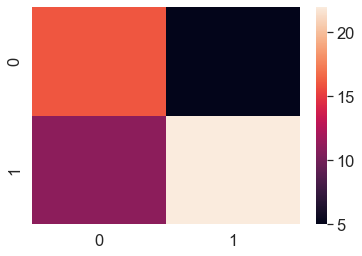

In [611]:
sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(Y_test , Y_preds)

sns.heatmap(conf_mat)

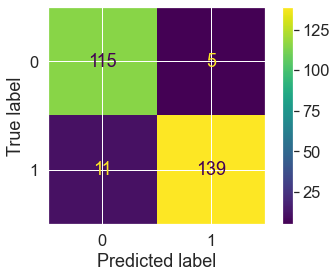

In [612]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)

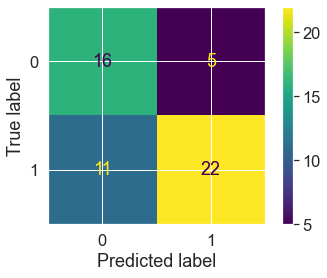

In [613]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                       y_pred = Y_preds)

In [614]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test , Y_preds))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        21
           1       0.81      0.67      0.73        33

    accuracy                           0.70        54
   macro avg       0.70      0.71      0.70        54
weighted avg       0.73      0.70      0.71        54



In [615]:
#where precision and recall become valuable 

disease_true = np.zeros(1000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(1000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taukeerahmad/Desktop/sample_project/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


In [616]:
from sklearn.metrics import r2_score

# fill an array with y_test mean 

y_test_mean = np.full(len(Y_test) , Y_test.mean())

y_test_mean[:10]

array([0.61111111, 0.61111111, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.61111111, 0.61111111, 0.61111111, 0.61111111])

In [617]:
r2_score(y_true = Y_test,
        y_pred = y_test_mean)

0.0

In [618]:
r2_score(y_true = Y_test,
        y_pred = Y_test)

1.0

In [619]:
from sklearn.metrics import mean_absolute_error

y_preds = clf.predict(X_test)
mae = mean_absolute_error(Y_test , y_preds)
mae

52.03703703703704

In [620]:
y_preds

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [621]:
df = pd.DataFrame(data = {"actual values" : Y_test,
                         "predicted values" : y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
30,0,0,0
116,0,0,0
79,1,1,0
127,1,1,0
196,1,0,255
137,0,0,0
209,1,0,255
45,1,1,0
158,1,1,0
247,1,1,0


In [622]:
np.abs(df["differences"]).mean()

52.03703703703704

In [623]:
from sklearn.model_selection import cross_val_score

# cross validation accuracy

cv_acc = cross_val_score(clf , X , Y , cv=5 , scoring =  "accuracy")
cv_acc

array([0.68518519, 0.68518519, 0.85185185, 0.72222222, 0.83333333])

In [624]:
np.mean(cv_acc)

0.7555555555555556

In [625]:
# precision 

np.random.seed(42)

cv_precision = cross_val_score(clf , X , Y , cv=5 , scoring = "precision")
cv_precision

array([0.63636364, 0.74074074, 0.81818182, 0.77777778, 0.85714286])

In [626]:
#recall 

np.random.seed(42)

cv_recall = cross_val_score(clf , X , Y , cv=5 , scoring = "recall")
cv_recall



array([0.7       , 0.66666667, 0.9       , 0.7       , 0.8       ])

In [627]:
np.mean(cv_recall)

0.7533333333333333

In [628]:
cv_r2 = cross_val_score(clf , X , Y , cv=5 , scoring = None)
np.mean(cv_r2)

0.7370370370370372

In [629]:
def evaluate_preds(y_true , y_preds):
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    metric_dict = {"accuracy" : round(accuracy , 2),
                  "precision" : round(precision , 2),
                  "recall" : round(recall, 2),
                  "f1": round(f1 , 2)}
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"precision:{precision:.2f}")
    print(f"recall:{recall:.2f}")
    print(f"f1 score:{f1:.2f}")
    
    return metric_dict
        

In [630]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

np.random.seed(42)

#shuffle the data 

df_shuffled = df2.sample(frac=1)

# split into x and y

x = df_shuffled.drop("Heart Disease" , axis = 1)

y = df_shuffled["Heart Disease"]

# split the data into train , test and validation 

train_split = round(0.7 * len(df_shuffled)) # 70% of dataset

valid_split = round(train_split + 0.15 * len(df_shuffled)) # 15% of data

x_train , y_train = x[:train_split] , y[:train_split]
 
x_valid , y_valid = x[train_split:valid_split] , y[train_split:valid_split]

x_test , y_test = x[valid_split:] , y[valid_split:]

len(x_train) , len(x_valid) , len(x_test)

clf = DecisionTreeClassifier()

clf.fit(x_train , y_train)

# make basleine prediction 

y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics

Acc:75.61%
precision:0.69
recall:0.69
f1 score:0.69


{'accuracy': 0.76, 'precision': 0.69, 'recall': 0.69, 'f1': 0.69}

In [631]:
np.random.seed(42)

# create a second classifier with different hyperparameter

clf_2 = DecisionTreeClassifier(max_depth=3)

clf_2.fit(x_train , y_train)

y_preds_2 = clf_2.predict(x_valid)

clf_2_metrics = evaluate_preds(y_valid , y_preds_2)



Acc:73.17%
precision:0.65
recall:0.69
f1 score:0.67


 **After setting the different parameters I found the best accuracy for this dataset is 73% which is given by the decision tree.**

# KNN


In [632]:
from sklearn.neighbors import KNeighborsClassifier

In [633]:
df3 = pd.read_csv("Heart_Disease_Prediction.csv")

In [634]:
dataset2 = pd.get_dummies(df2, columns = ['Cholesterol' , 'BP' , 'Max HR' , 'Thallium' , 'Age' , 'Chest pain type' , 'EKG results' , 'Slope of ST'])

In [635]:
dataset2

,Sex,FBS over 120,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Cholesterol_126,Cholesterol_141,Cholesterol_149,Cholesterol_160,...,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3
0,1,0,0,2.4,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,1.6,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0.3,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,1,0.2,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,0,0,1,0.2,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,1,0,0.5,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
266,1,0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
267,0,0,0,1.3,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
268,1,0,0,0.4,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [636]:
standardScaler = StandardScaler()

columns_scale = ['Sex' , 'FBS over 120' , 'Exercise angina' , 'ST depression' , 'Number of vessels fluro']

dataset2[columns_scale] = standardScaler.fit_transform(dataset2[columns_scale])

**I am doing standard scaling because here are some features having different variations and they are measured in different units that will help us to scale down the value within the standard distribution.**

In [637]:
y = dataset2['Heart Disease']
x = dataset2.drop(['Heart Disease'] , axis =1)

In [638]:
knn_scores = []

for k in range(1,5):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier , x , y , cv =3)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors classifier scores for different K values')

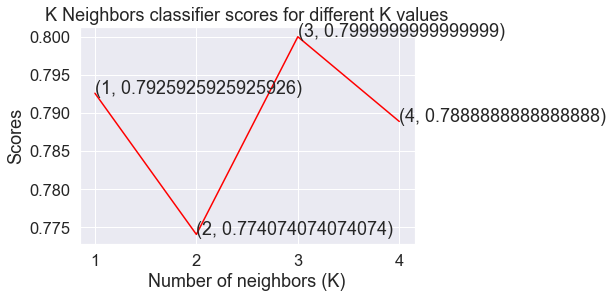

In [639]:
plt.plot([k for k in range (1,5)], knn_scores , color = 'red')

for i in range(1,5):
    plt.text(i , knn_scores[i - 1], (i , knn_scores[i-1]))
plt.xticks([i for i in range(1,5)])
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors classifier scores for different K values')

I am trying to find out 5 nearest neighbors For every iteration from 1 to 5,  I am finding the score with the value of different k based on cv = 3

In [647]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 4)
score = cross_val_score(knn_classifier , x , y , cv =5)

score.mean()

0.7777777777777779

In [646]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 8)
score = cross_val_score(knn_classifier , x , y , cv =5)

score.mean()

0.825925925925926

In [648]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier , x , y , cv =5)

score.mean()

0.8518518518518519

# Conclusion


For the second dataset the conclusion is that is KNN giving the better accuracy than decision tree classifier. initially KNN was giving the accuracy of 80% but after setting the value of K to 12 I got the best results which was 85 %. For Decision tree I got the best result at max_depth = 3 which is 73%. So we can conclude that KNN is performing better than decsion tree in dataset 2 which has sample size lesser than dataset 1.
